## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
x_train, y_train = train
x_test, y_test = test
x_train = x_train / 255.
x_test = x_test / 255.

# Flatten the images
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# Convert y to onehot
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    """
    Try to build your own model
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])

    return model
model = build_mlp()

In [5]:
"""
Compile your model
"""
model.summary()
optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
"""
Set epochs
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 4s 72us/step - loss: 2.2833 - acc: 0.1502 - val_loss: 2.2347 - val_acc: 0.1984
Epoch 2/500
50000/50000 [==============================] - 2s 39us/step - loss: 2.2018 - acc: 0.2202 - val_loss: 2.1735 - val_acc: 0.2373
Epoch 3/500
50000/50000 [==============================] - 2s 37us/step - loss: 2.1474 - acc: 0.2463 - val_loss: 2.1253 - val_acc: 0.2544
Epoch 4/500
50000/50000 [==============================] - 2s 37us/step - loss: 2.1036 - acc: 0.2629 - val_loss: 2.0852 - val_acc: 0.2743
Epoch 5/500
50000/50000 [==============================] - 2s 39us/step - loss: 2.0666 - acc: 0.2790 - val_loss: 2.0509 - val_acc: 0.2892
Epoch 6/500
50000/50000 [==============================] - 2s 38us/step - loss: 2.0346 - acc: 0.2912 - val_loss: 2.0208 - val_acc: 0.3015
Epoch 7/500
50000/50000 [==============================] - 2s 37us/step - loss: 2.0067 - acc: 0.3023 - val_loss: 1.9949 - 

50000/50000 [==============================] - 2s 36us/step - loss: 1.6557 - acc: 0.4243 - val_loss: 1.6646 - val_acc: 0.4203
Epoch 60/500
50000/50000 [==============================] - 2s 36us/step - loss: 1.6525 - acc: 0.4244 - val_loss: 1.6652 - val_acc: 0.4182
Epoch 61/500
50000/50000 [==============================] - 2s 37us/step - loss: 1.6495 - acc: 0.4268 - val_loss: 1.6636 - val_acc: 0.4211
Epoch 62/500
50000/50000 [==============================] - 2s 37us/step - loss: 1.6462 - acc: 0.4273 - val_loss: 1.6566 - val_acc: 0.4232
Epoch 63/500
50000/50000 [==============================] - 2s 37us/step - loss: 1.6434 - acc: 0.4284 - val_loss: 1.6537 - val_acc: 0.4237
Epoch 64/500
50000/50000 [==============================] - 2s 37us/step - loss: 1.6404 - acc: 0.4291 - val_loss: 1.6518 - val_acc: 0.4213
Epoch 65/500
50000/50000 [==============================] - 2s 37us/step - loss: 1.6376 - acc: 0.4306 - val_loss: 1.6486 - val_acc: 0.4244
Epoch 66/500
50000/50000 [==============

Epoch 118/500
50000/50000 [==============================] - 2s 37us/step - loss: 1.5171 - acc: 0.4715 - val_loss: 1.5439 - val_acc: 0.4575
Epoch 119/500
50000/50000 [==============================] - 2s 36us/step - loss: 1.5153 - acc: 0.4732 - val_loss: 1.5434 - val_acc: 0.4584
Epoch 120/500
50000/50000 [==============================] - 2s 37us/step - loss: 1.5134 - acc: 0.4736 - val_loss: 1.5421 - val_acc: 0.4559
Epoch 121/500
50000/50000 [==============================] - 2s 37us/step - loss: 1.5116 - acc: 0.4735 - val_loss: 1.5462 - val_acc: 0.4561
Epoch 122/500
50000/50000 [==============================] - 2s 36us/step - loss: 1.5096 - acc: 0.4744 - val_loss: 1.5414 - val_acc: 0.4581
Epoch 123/500
50000/50000 [==============================] - 2s 37us/step - loss: 1.5081 - acc: 0.4754 - val_loss: 1.5381 - val_acc: 0.4607
Epoch 124/500
50000/50000 [==============================] - 2s 37us/step - loss: 1.5059 - acc: 0.4758 - val_loss: 1.5415 - val_acc: 0.4586
Epoch 125/500
50000/

50000/50000 [==============================] - 2s 37us/step - loss: 1.4215 - acc: 0.5056 - val_loss: 1.4740 - val_acc: 0.4817
Epoch 177/500
50000/50000 [==============================] - 2s 36us/step - loss: 1.4200 - acc: 0.5057 - val_loss: 1.4788 - val_acc: 0.4779
Epoch 178/500
50000/50000 [==============================] - 2s 36us/step - loss: 1.4190 - acc: 0.5065 - val_loss: 1.4726 - val_acc: 0.4822
Epoch 179/500
50000/50000 [==============================] - 2s 37us/step - loss: 1.4173 - acc: 0.5060 - val_loss: 1.4711 - val_acc: 0.4815
Epoch 180/500
50000/50000 [==============================] - 2s 36us/step - loss: 1.4158 - acc: 0.5075 - val_loss: 1.4681 - val_acc: 0.4851
Epoch 181/500
50000/50000 [==============================] - 2s 37us/step - loss: 1.4147 - acc: 0.5076 - val_loss: 1.4745 - val_acc: 0.4823
Epoch 182/500
50000/50000 [==============================] - 2s 36us/step - loss: 1.4132 - acc: 0.5082 - val_loss: 1.4700 - val_acc: 0.4855
Epoch 183/500
50000/50000 [=======

50000/50000 [==============================] - 2s 37us/step - loss: 1.3416 - acc: 0.5325 - val_loss: 1.4221 - val_acc: 0.4993
Epoch 235/500
50000/50000 [==============================] - 2s 37us/step - loss: 1.3404 - acc: 0.5334 - val_loss: 1.4228 - val_acc: 0.4987
Epoch 236/500
50000/50000 [==============================] - 2s 37us/step - loss: 1.3388 - acc: 0.5326 - val_loss: 1.4263 - val_acc: 0.4991
Epoch 237/500
50000/50000 [==============================] - 2s 37us/step - loss: 1.3377 - acc: 0.5333 - val_loss: 1.4203 - val_acc: 0.4984
Epoch 238/500
50000/50000 [==============================] - 2s 37us/step - loss: 1.3364 - acc: 0.5345 - val_loss: 1.4334 - val_acc: 0.4937
Epoch 239/500
50000/50000 [==============================] - 2s 36us/step - loss: 1.3350 - acc: 0.5345 - val_loss: 1.4199 - val_acc: 0.5000
Epoch 240/500
50000/50000 [==============================] - 2s 37us/step - loss: 1.3339 - acc: 0.5359 - val_loss: 1.4285 - val_acc: 0.4911
Epoch 241/500
50000/50000 [=======

50000/50000 [==============================] - 2s 36us/step - loss: 1.2709 - acc: 0.5559 - val_loss: 1.3873 - val_acc: 0.5108
Epoch 293/500
50000/50000 [==============================] - 2s 36us/step - loss: 1.2701 - acc: 0.5562 - val_loss: 1.3884 - val_acc: 0.5096
Epoch 294/500
50000/50000 [==============================] - 2s 37us/step - loss: 1.2688 - acc: 0.5566 - val_loss: 1.3977 - val_acc: 0.5090
Epoch 295/500
50000/50000 [==============================] - 2s 37us/step - loss: 1.2683 - acc: 0.5568 - val_loss: 1.3925 - val_acc: 0.5063
Epoch 296/500
50000/50000 [==============================] - 2s 37us/step - loss: 1.2667 - acc: 0.5584 - val_loss: 1.3873 - val_acc: 0.5070
Epoch 297/500
50000/50000 [==============================] - 2s 36us/step - loss: 1.2651 - acc: 0.5590 - val_loss: 1.3911 - val_acc: 0.5101
Epoch 298/500
50000/50000 [==============================] - 2s 37us/step - loss: 1.2646 - acc: 0.5589 - val_loss: 1.3976 - val_acc: 0.5029
Epoch 299/500
50000/50000 [=======

50000/50000 [==============================] - 2s 37us/step - loss: 1.2064 - acc: 0.5781 - val_loss: 1.3667 - val_acc: 0.5152
Epoch 351/500
50000/50000 [==============================] - 2s 36us/step - loss: 1.2063 - acc: 0.5778 - val_loss: 1.3878 - val_acc: 0.5101
Epoch 352/500
50000/50000 [==============================] - 2s 37us/step - loss: 1.2047 - acc: 0.5791 - val_loss: 1.3699 - val_acc: 0.5141
Epoch 353/500
50000/50000 [==============================] - 2s 37us/step - loss: 1.2025 - acc: 0.5813 - val_loss: 1.3815 - val_acc: 0.5129
Epoch 354/500
50000/50000 [==============================] - 2s 37us/step - loss: 1.2021 - acc: 0.5814 - val_loss: 1.3616 - val_acc: 0.5158
Epoch 355/500
50000/50000 [==============================] - 2s 36us/step - loss: 1.2007 - acc: 0.5804 - val_loss: 1.3813 - val_acc: 0.5110
Epoch 356/500
50000/50000 [==============================] - 2s 37us/step - loss: 1.2005 - acc: 0.5822 - val_loss: 1.3851 - val_acc: 0.5089
Epoch 357/500
50000/50000 [=======

50000/50000 [==============================] - 2s 36us/step - loss: 1.1461 - acc: 0.6005 - val_loss: 1.3749 - val_acc: 0.5118
Epoch 409/500
50000/50000 [==============================] - 2s 37us/step - loss: 1.1461 - acc: 0.6008 - val_loss: 1.4219 - val_acc: 0.5053
Epoch 410/500
50000/50000 [==============================] - 2s 37us/step - loss: 1.1447 - acc: 0.6001 - val_loss: 1.3546 - val_acc: 0.5218
Epoch 411/500
50000/50000 [==============================] - 2s 37us/step - loss: 1.1430 - acc: 0.6011 - val_loss: 1.3516 - val_acc: 0.5192
Epoch 412/500
50000/50000 [==============================] - 2s 37us/step - loss: 1.1419 - acc: 0.6005 - val_loss: 1.3514 - val_acc: 0.5208
Epoch 413/500
50000/50000 [==============================] - 2s 37us/step - loss: 1.1402 - acc: 0.6019 - val_loss: 1.3566 - val_acc: 0.5202
Epoch 414/500
50000/50000 [==============================] - 2s 37us/step - loss: 1.1404 - acc: 0.6022 - val_loss: 1.3463 - val_acc: 0.5225
Epoch 415/500
50000/50000 [=======

50000/50000 [==============================] - 2s 37us/step - loss: 1.0881 - acc: 0.6202 - val_loss: 1.3435 - val_acc: 0.5235
Epoch 467/500
50000/50000 [==============================] - 2s 39us/step - loss: 1.0871 - acc: 0.6204 - val_loss: 1.3467 - val_acc: 0.5264
Epoch 468/500
50000/50000 [==============================] - 2s 39us/step - loss: 1.0858 - acc: 0.6216 - val_loss: 1.3638 - val_acc: 0.5149
Epoch 469/500
50000/50000 [==============================] - 2s 37us/step - loss: 1.0857 - acc: 0.6217 - val_loss: 1.4472 - val_acc: 0.4957
Epoch 470/500
50000/50000 [==============================] - 2s 38us/step - loss: 1.0839 - acc: 0.6228 - val_loss: 1.3342 - val_acc: 0.5301
Epoch 471/500
50000/50000 [==============================] - 2s 37us/step - loss: 1.0829 - acc: 0.6216 - val_loss: 1.3436 - val_acc: 0.5241
Epoch 472/500
50000/50000 [==============================] - 2s 37us/step - loss: 1.0815 - acc: 0.6213 - val_loss: 1.3394 - val_acc: 0.5283
Epoch 473/500
50000/50000 [=======

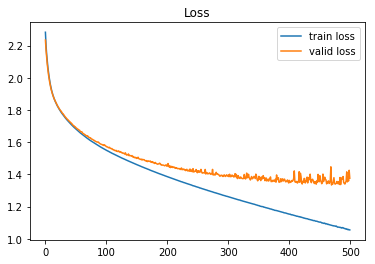

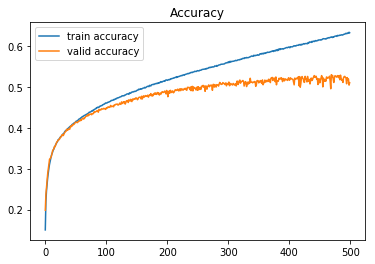

In [8]:
import matplotlib.pyplot as plt
"""
Get the training loss / validation loss / training accuracy / validation accuracy and plot them
"""

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()